In [1]:
import os
import numpy
import pydicom
import numpy as np
# import matplotlib
# When running in a headless system it is necessary to set the matplotlib backend appropiately
# to avoid a cannot connect to X server error
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt
# # matplotlib.rcParams["backend"] = "Qt5Agg"
# %matplotlib
%matplotlib nbagg
import hyperspy.api as hs
# # Hotkeys and modifier keys for navigating the plot can be set in the hs.preferences.gui()
hs.preferences.gui(toolkit="ipywidgets")
hs.preferences.save()

import warnings
warnings.filterwarnings('ignore')
# # https://community.backtrader.com/topic/1455/plotting-inside-jupyterlab/2
# # The TkAgg backend requires a running X server, 
# # which is hard to do inside a headless docker container. 

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [3]:
# https://yadi.sk/d/OmpaRXt3hIq5Gg
import os
import numpy as np
import pydicom

# PathDicom = "./meddata/1/data/images/"
PathDicom = "./images/"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(dirName+'/'+filename)
print (len(lstFilesDCM))

686


In [4]:
# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
# Calculate coordinate axes for this array 
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [5]:
%%time
# Load all the pixel data into an appropriate sized NumPy array named ArrayDicom
# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  

Wall time: 4.96 s


<IPython.core.display.Javascript object>


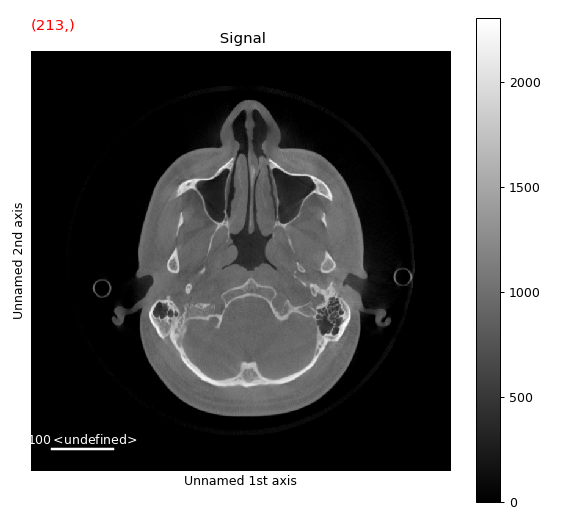

In [6]:
s = hs.signals.BaseSignal(ArrayDicom)
s.transpose(signal_axes=(1,2)).plot(navigator='slider')